In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

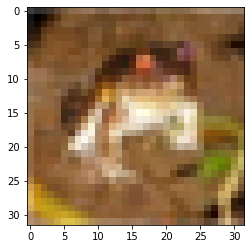

In [6]:
plt.imshow(X_train[0])

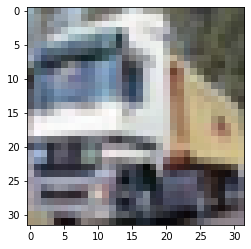

In [7]:
plt.imshow(X_train[1])

In [8]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [9]:
y_train = y_train.reshape(-1,)

In [10]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [11]:
classes = ["airplane", "automobile", "birds", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [12]:
classes[2]

'birds'

In [13]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

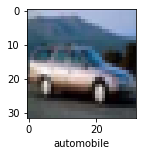

In [14]:
plot_sample(X_train, y_train, 4)

In [15]:
#Normalization of data 0 to 1 range


In [16]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [17]:
X_train[0]/255

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [18]:
X_train = X_train / 255
X_test = X_test /255

In [19]:
#Artificial neural network for image classification
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)



Epoch 1/5
1563/1563 [==============================] - 99s 64ms/step - loss: 1.8134 - accuracy: 0.3580
Epoch 2/5
1563/1563 [==============================] - 86s 55ms/step - loss: 1.6257 - accuracy: 0.4260
Epoch 3/5
1563/1563 [==============================] - 98s 62ms/step - loss: 1.5441 - accuracy: 0.4569
Epoch 4/5
1563/1563 [==============================] - 102s 65ms/step - loss: 1.4833 - accuracy: 0.4762
Epoch 5/5
1563/1563 [==============================] - 100s 64ms/step - loss: 1.4343 - accuracy: 0.4943


In [20]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))


Classification Report: 
               precision    recall  f1-score   support

           0       0.46      0.67      0.55      1000
           1       0.59      0.59      0.59      1000
           2       0.33      0.46      0.39      1000
           3       0.41      0.20      0.26      1000
           4       0.40      0.40      0.40      1000
           5       0.41      0.39      0.40      1000
           6       0.57      0.43      0.49      1000
           7       0.49      0.63      0.55      1000
           8       0.70      0.48      0.57      1000
           9       0.57      0.55      0.56      1000

    accuracy                           0.48     10000
   macro avg       0.49      0.48      0.48     10000
weighted avg       0.49      0.48      0.48     10000



In [21]:
cnn = models.Sequential([
    
        #cnn layers
    
        layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)), # number of filter, filter size, activation function, input_shape
        layers.MaxPooling2D((2,2)),
   
    
        layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'), 
        layers.MaxPooling2D((2,2)),
    
    
        # dense layers
                         
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

In [22]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 38s 24ms/step - loss: 1.4775 - accuracy: 0.4705
Epoch 2/10
1563/1563 [==============================] - 38s 25ms/step - loss: 1.1318 - accuracy: 0.6021
Epoch 3/10
1563/1563 [==============================] - 37s 24ms/step - loss: 1.0103 - accuracy: 0.6472
Epoch 4/10
1563/1563 [==============================] - 34s 22ms/step - loss: 0.9271 - accuracy: 0.6777
Epoch 5/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.8654 - accuracy: 0.6959
Epoch 6/10
1563/1563 [==============================] - 40s 25ms/step - loss: 0.8100 - accuracy: 0.7171
Epoch 7/10
1563/1563 [==============================] - 37s 24ms/step - loss: 0.7594 - accuracy: 0.7353
Epoch 8/10
1563/1563 [==============================] - 37s 24ms/step - loss: 0.7173 - accuracy: 0.7478
Epoch 9/10
1249/1563 [======================>.......] - ETA: 7s - loss: 0.6745 - accuracy: 0.7639

In [ ]:
cnn.evaluate(X_test, y_test)

In [ ]:
y_test[:5]

In [ ]:
# Converting y test in one dimentional array

y_test = y_test.reshape(-1,)
y_test[:5]

In [ ]:
plot_sample(X_test, y_test, 1)

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

In [ ]:
np.argmax(y_pred[1])

In [ ]:
classes


In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

In [ ]:
y_test[:5]

In [ ]:
plot_sample(X_test, y_test, 9)

In [ ]:
classes[y_classes[9]]

In [ ]:
print("Classification Report: \n: ", classification_report(y_test, y_classes))